<a href="https://colab.research.google.com/github/BreakoutMentors/Data-Science-and-Machine-Learning/blob/master/machine_learning/lesson%202%20-%20logistic%20regression/softmax-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification: Softmax Regression
In the previos lesson [logistic regression](https://github.com/BreakoutMentors/Data-Science-and-Machine-Learning/blob/master/machine_learning/lesson%202%20-%20logistic%20regression/logistic-regression.ipynb), we learned about logistic regression and how it can be used to construct a logistic regression classifier to distinguish between two categorical values (e.g., whether a photo is of a dog or a cat). Logistic regression is great when we want are working with only two categorical values. 

In practice, we are often more interested in differentiating between many categorical values (e.g., more than 2 classes):
- Is this image of a cat, a dog, or a chicken?
- Is this song in the genre of hip hop, pop, funk, rock, etc.?
- What brand of clothing does this t-shirt belong to?

When we want to distinguish between many classes (called *multi-class classification*), we can use a classification technique called softmax regression.

In this notebook, we will learn the foundations of softmax regression and demonstrate how to solve multi-class classification problems using an example--building a softmax regression classifier to distinguish 10 handwritten digit (0-9). The ideas we introduce here will build on previous material and continue to lay out the fundamental concepts used in deep learning and neural networks, which we will cover in future lessons. Here is the lesson roadmap:
1. Review: representing categorical data
2. Introduction to softmax regression
3. Building a softmax regression classifier: recognize 10 handwritten digits from the MNIST dataset 
4. Summary



# Review: representing categorical data
<figure>
  <img src='https://envato-shoebox-0.imgix.net/2718/a008-795b-4376-972d-ed9cbad8ac4f/2015_227_003_0063_A_2018_07_19.jpg?auto=compress%2Cformat&fit=max&mark=https%3A%2F%2Felements-assets.envato.com%2Fstatic%2Fwatermark2.png&markalign=center%2Cmiddle&markalpha=18&w=700&s=e3fbeb220008b297bee64675504ae70c' width='50%'>
  <figcaption>Representing data: a Shina Inu, Retriever, and Lab</figcaption>
</figure>



To motivate our understanding of softmax regression, let's consider the example where we want to distinguish 3 different dog breeds--(golden) retrievers, labs, and shiba inus, given $2 \times 2$ grayscale images. We can represent each pixel value with a single scalar (number), giving us four features  $x_1,x_2,x_3,x_4$. Further, we know that each image belongs to one among the categories "retriever", "lab", "shina inu".

To make the categorical labels useful, we need to convert it into a numerical representation.  

There are two general ways to represent the categorical data in numeric terms. The first way is to choose choose $y \in \{1, 2, 3\}$, where the integers represent {retriever, lab, shina inu} repectively. But, as you learned previously, the second way is better: *one-hot encoding*. As a refresher, a one-hot encoding is a vector with as many components as we have categories. The component corresponding to particular sample's category is set to 1 and all other components are set to 0. So in our case, this translates to:

$$
y \in \{ (1, 0, 0), (0, 1, 0), (0, 0, 1) \},
$$

where $y$ would be a three-dimensional vector representing the dog breeds, with $(1, 0, 0)$ corresponding to "retriever", (0, 1, 0) to "lab", and (0, 0, 1) to "shiba inu".

# Intro to softmax regression
<figure>
  <img src='https://d2l.ai/_images/softmaxreg.svg' width='70%'>
  <figcaption>Softmax regression is a single-layer neural network | Source: <a href='https://d2l.ai/_images/softmaxreg.svg'>Dive Into Deep Learning</a></figcaption>
</figure>

Now that we have a healthy understanding of classification techniques like *one-hot encoding* and logistic regression, let's dive into the softmax regression.

Softmax regression is perhaps the most common machine learning algorithm. It is a special case of logistic regression where the labels ($y$) is categorical in nature but there are many categories rather than simply two. It is called "softmax" regression because it uses a *logit* function, called the *softmax* function, to estimate the *conditional probability* of a given class among many classes (i.e., more than 2). Unlike linear and logistic regression, softmax regression requires a model with multiple outputs, one per class. 

To address multi-class classification with softmax regression classifiers, we will need as many linear functions as we have outputs. Each output will correspond to its own linear function. In our case, since we have 4 features and 3 possible output categories, we will need 12 scalars to represent the weights, ( $w$  with subscripts) and 3 scalars to represent the biases ($b$ with subscripts). We compute these three *logits*, $o_1,o_2$, and $o_3$, for each input:

\begin{split}\begin{aligned}
o_1 &= x_1 w_{11} + x_2 w_{12} + x_3 w_{13} + x_4 w_{14} + b_1,\\
o_2 &= x_1 w_{21} + x_2 w_{22} + x_3 w_{23} + x_4 w_{24} + b_2,\\
o_3 &= x_1 w_{31} + x_2 w_{32} + x_3 w_{33} + x_4 w_{34} + b_3.
\end{aligned}\end{split}


We can depict this calculation with the neural network diagram shown above. Just as in linear regression, softmax regression is also a *single-layer neural network*. And since the calculation of each output, $o_1,o_2$, and $o_3$, depends on all inputs, $x_1, x_2, x_3$, and $x_4$, the output layer of softmax regression can also be described as *fully-connected* layer.

To express the model more compactly, we can use linear algebra notation. In vector form, we arrive at  $\mathbf{o} = \mathbf{W} \mathbf{x} + \mathbf{b} $, a form better suited both for mathematics, and for writing code. Note that we have gathered all of our weights into a  $3 \times 4$  matrix and that for a given example $\mathbf{x}$, our outputs are given by a *matrix-vector product* of our weights by our inputs plus our biases  $b$. From the above describtion, hopefully softmax regression feels suprisingly familiar to you, since it shares many of the techniques used by linear and logistic regression methods.


## The softmax operation

<figure>
  <img src='https://deepnotes.io/public/images/softmax.png' width='50%'>
  <figcaption>Single-layer softmax regression neural network | Source: <a href='https://deepnotes.io/'>deepnotes.io</a></figcaption>
</figure>



The main approach of softmax regression is to interpret the outputs of our model as probabilities. We will *optimize* our parameters to produce probabilities that *maximize the likelihood* of the observed data, just like logistic regression. Then, we generate predictions using a threshold (which we define), for example, choosing the *argmax* of the predicted probabilities. The *argmax* defines a given sample's predicted class based on the category with the highest probability value.

Put formally, we would like outputs  $\hat{y}_k$  that we can interpret as the probability that a given item belongs to class $k$. Then, we can choose the class with the largest output value as our prediction  $\text{argmax}_k y_k $. For example, if $\hat{y}_1 , \hat{y}_2$, and $\hat{y}_3$  are  $0.1, 0.8$, and $0.1$, respectively, then we predict category $2$, which (in our example) represents "lab".

To interpret our outputs as probabilities, we must guarantee two things:
1. They will be nonnegative.
2. Given an input sample, the total of all the class probabilities sum up to 1.

To transform our logits such that they become nonnegative and sum to $1$, while maintaining that the model remains differentiable (for gradient descent), we first exponentiate each logit (ensuring non-negativity) and then divide by their sum (ensuring that they sum to $1$). 

$$
\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o})\quad \text{where}\quad
\hat{y}_i = \frac{\exp(o_i)}{\sum_j \exp(o_j)}.
$$

Now we can guarantee $\hat{y}_1+\hat{y}_2+\hat{y}_3 = 1$  with  $0≤\hat{y}_i≤1$ for all $i$ . Thus, we can interpret $\hat{y}$ as a proper probability distribution. Note that the softmax operation does not change the ordering among the logits, and thus we can still pick out the most likely class by:

$$
\hat{\imath}(\mathbf{o}) = \operatorname*{argmax}_i o_i = \operatorname*{argmax}_i \hat y_i.
$$


## A note on the loss function
The loss function for softmax regression is called categorical *cross-entropy*. A detailed description of cross-entropy is beyond the scope of this lesson. However, it's worth a quick summary. 

At a high level, cross-entropy is a measure of the difference between two probability distributions. It measures the amount of information (also called *bits*) needed to encode the data given our model. The goal is to predict the correct labels most of the time (via *maximum likelihood estimation*), while minimizing the *suprise* (entropy) required to communicate the labels.

## Summary: Softmax Regression

To summarize softmax regression:
- Category labels ($y$) are converted to discrete integer values and represented using multi-dimensional vectors (e.g., dimensions $=$ # of classes $k$).
- The *softmax* logit function maps input features ($\mathbf{x}$) to probabilities and guarantees that they are nonnegative and sum up to 1.
- A category prediction is determined by the threshold function, such as *argmax*, which selects the class with the highest probability among all $k$ classes.   
- Softmax regression classifiers try to *maximize the likelihood* of the observed data, like logistic regression.
- Categorical *cross-entorpy* is the loss function for softmax regression.  

# Softmax Regression: build a classifier to recognize handwritten digits

Now that we know about the fundamentals of softmax regression, let's apply this method to a real-world problem--distinguishing between 10 handwritten digits (0-9) given the MNIST dataset--a dataset of grayscale handwritten digits. In this section, we will demonstrate in an end-to-end fashion the process of creating a softmax regression classifier: from building, to training, and finally evaluating the model to solve the handwritten digit classification task. This process involves several steps:

1. Find, load, and prepare a dataset for the model.
2. Build the model.
3. Train the model using an algorithm such as stochastic gradient descent.
4. Evaluate the quality of our model.
5. Draw conclusions.

In [9]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.2.0


## 1. Finding and preparing the dataset
For step 1, we found the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). The dataset contains 70k grayscale images of handwritten digits at a resolution of $28 \times 28$ pixels. Our goal is to build a classification model to take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence about the prediction):

<figure><img src="https://i.imgur.com/ITrm9x4.png" width="65%"><figcaption><em>Source: <a href="https://deeplearning.mit.edu/">MIT Deep Learning</a></em></figcaption></figure>


Loading the dataset will return four NumPy arrays:
* The `train_features` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The `test_features` and `test_labels` arrays are the *test set*--the data the model is tested on.

The images are $28\times28$ NumPy arrays (i.e., the x variables), with pixel values ranging between 0 and 255. The *labels* (i.e., $y$) are an array of integers, ranging from 0 to 9. We will use *one-hot encoding* (the technique we learned about in the logistic regression lesson) to convert these labels to vectors (i.e., arrays with mostly 0s and a 1 at the index that corresponds to the data sample's digit category). We also need to *normalize* the input images between 0 and 1. This is achieved by dividing the features of each image by 255 (i.e., the max pixel value). Normalizing the data encourages our model to learn more generalizable features and helps it perform better on outside data. The final data processing step is "flattening" the $28\times28$ image pixel matrices into 784 image pixel arrays. We reshape the image matrices into arrays because our model expects the input to be a vector/array with 784 features (i.e., values). 

Now, let's load the data!

In [6]:
# Model / data parameters
num_classes = 10
input_shape = (-1, 28*28) # this will be used to reshape the 28x28 image pixel matrices into 784 pixel vectors 

# the data, split between train and test sets
(train_features, train_labels), (test_features, test_labels) = keras.datasets.mnist.load_data()

# Normalize the images to the [0, 1] range
train_features = train_features.astype("float32") / 255
test_features = test_features.astype("float32") / 255

# Flatten the images.
train_features = train_features.reshape(input_shape)
test_features = test_features.reshape(input_shape)

print("train_features shape:", train_features.shape)
print("test_features shape:", test_features.shape)

print(train_features.shape[0], "train samples")
print(test_features.shape[0], "test samples")


# convert class vectors (one-hot encoding)
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

train_features shape: (60000, 784)
test_features shape: (10000, 784)
60000 train samples
10000 test samples


Let's display the first 5 images from the *training set* and display the class name below each image.

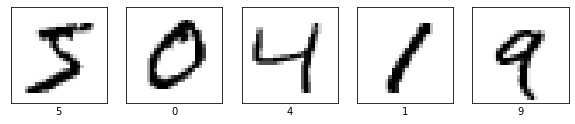

In [7]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_features[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(np.argmax(train_labels[i]))

## 3. Build the model
Now that the data is ready, we can build the softmax classifier. We will use Tensorflow to define a simple softmax regression model (single-layer fully-connected neural network) to predict the class of each image (a digit between 0 and 9). Given a sample with a corresponding set of class predictions, our model will select the class with the highest prediction value using *argmax*. 

We also define the loss function, optimization algorithm, and metrics and "glue" them together with the model using the `compile` method. We will use *binary cross-entropy* loss, *stochastic gradient descent*, and track the *accuracy* metric.

Notice that the `Dense` layer contains 10 *neurons* instead of 1, which is different from the logistic regression lesson (1 neuron). This is because we need to calculate probabilities for 10 classes (digits 0-9).

In [10]:
# build the linear model 
model = keras.Sequential([
            layers.Input((train_features.shape[-1],)), # the input layer (corresponds to the features)
            layers.Dense(10, activation='softmax'), # the output layer with the softmax function (this layer contains the weights and a bias term)
        ], name='softmax_regression_model')

print('model summary')
print(model.summary())

# define the loss function, optimization algorithm, and metrics for the model
# and "glue" them all together
model.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])


model summary
Model: "softmax_regression_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


## 4. Train the model
No it's time to train the model. We will train it for 100 *epochs* (iterations) with a *batch size* of 2048 (the number of training examples to evaluate prior to doing gradient descent), and record the training and validation metrics in the `history` object.

In [12]:
epochs = 50
batch_size = 128


history = model.fit(train_features, train_labels,
                    epochs=epochs, validation_split=0.1,
                    batch_size=batch_size)

Epoch 1/50
422/422 [==============================] - 1s 3ms/step - loss: 0.3702 - accuracy: 0.8983 - val_loss: 0.3048 - val_accuracy: 0.9190
Epoch 2/50
422/422 [==============================] - 1s 3ms/step - loss: 0.3667 - accuracy: 0.8993 - val_loss: 0.3021 - val_accuracy: 0.9200
Epoch 3/50
422/422 [==============================] - 1s 3ms/step - loss: 0.3635 - accuracy: 0.8999 - val_loss: 0.2995 - val_accuracy: 0.9205
Epoch 4/50
422/422 [==============================] - 1s 3ms/step - loss: 0.3605 - accuracy: 0.9008 - val_loss: 0.2976 - val_accuracy: 0.9207
Epoch 5/50
422/422 [==============================] - 1s 3ms/step - loss: 0.3578 - accuracy: 0.9014 - val_loss: 0.2950 - val_accuracy: 0.9208
Epoch 6/50
422/422 [==============================] - 1s 3ms/step - loss: 0.3552 - accuracy: 0.9020 - val_loss: 0.2931 - val_accuracy: 0.9212
Epoch 7/50
422/422 [==============================] - 1s 3ms/step - loss: 0.3528 - accuracy: 0.9026 - val_loss: 0.2910 - val_accuracy: 0.9227
Epoch 

        loss  accuracy  val_loss  val_accuracy  epoch
45  0.309180  0.914185  0.258287      0.929333     45
46  0.308598  0.914019  0.257859      0.928833     46
47  0.308062  0.914370  0.257513      0.929500     47
48  0.307546  0.914667  0.257053      0.929667     48
49  0.306998  0.914685  0.256569      0.929000     49


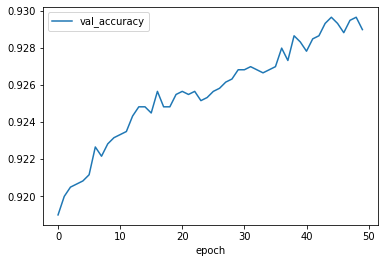

In [13]:
# create a dataframe to store the history 
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.tail())

# visualize the mean squared error over the training process
hist.plot.line(x='epoch', y='val_accuracy');

As the above plot suggests, our model has not converged to the optimal parameters yet after training for 50 epochs (iterations). This suggests the accuracy may improve with more training (more epochs). Further, the validation accuracy peaks around ~93%.  

## 5. Evaluate the model
Now that we trained our model, it's time to evaluate it using the test dataset, which we did not use when training the model. This gives us a sense of how well our model predicts unseen data, which is the case when we use it in the real world. We will use the `evaluate` method to test the model.

In [14]:
loss, accuracy = model.evaluate(test_features, test_labels)
print('Test set accuracy: {}%'.format(round(accuracy, 4)*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.2929 - accuracy: 0.9181
Test set accuracy: 91.81%


In [20]:
print('training set distribution of digit classes:', np.sum(train_labels, axis=0))
print('test set distribution of digit classes:', np.sum(test_labels, axis=0))


training set distribution of digit classes: [5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]
test set distribution of digit classes: [ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]


Wow! Our softmax classifier fit the MNIST digit data pretty well, correctly predicting the unseen handwritten digits around 91% to 92% of the time. Since the dataset is fairly balanced (i.e., the digit classes are close to equally represented), we can be relatively confident that the test set accuracy score provides a good estimate for how the model will perform on similar unseen handwritten digit data.

# Summary

- We use *one-hot encoding* to represent categorical data.
- Softmax regression is probably the popular classification technique and it is a foundational algorithm for classification methods in deep learning (neural networks). 
- The *softmax* logit function maps the input features to a probability distribution that guarantees the values are nonnegative and sum up to 1.
- Softmax regression classifiers try to *maximize the likelihood* of the observed data, like logistic regression.
- Categorical *cross-entorpy* is the loss function for softmax regression.  